In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import streamlit as st
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image


In [5]:
# STEP 1 Prepare Your Nation Code
nation_option = dict()
nation_name = []
json_data = json.load(open("kode_negara_lengkap.json",'r'))
for line in json_data :
    kode_negara = line['alpha-3']
    nama_negara = line['name']
    nation_option[kode_negara] = nation_option.get(kode_negara,nama_negara)
    nation_name.append(nama_negara)

# STEP 2 Make Streanlit Interface
st.set_page_config(layout="wide") 
st.title("Oily")
st.subheader("PetroCal.ltd Production")
'''Oily is a Web that provides data about oil in an integrated manner '''
image = Image.open('Oily.png')
st.sidebar.image(image)

DeltaGenerator(_root_container=1, _provided_cursor=None, _parent=DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None), _block_type=None, _form_data=None)

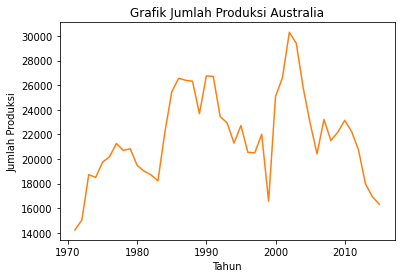

In [6]:
# STEP 3 Get the Datas
st.header("Oil Data per Nations")
data_minyak = pd.read_csv('produksi_minyak_mentah.csv')
dataset_name = st.sidebar.selectbox("Nations",(nation_name))  
for key,value in nation_option.items():
    if dataset_name == value :
        data_find = data_minyak['kode_negara'].str.contains(key)      
st.subheader("Data")    
data_minyak[data_find]

## melakukan plotting
st.subheader("Graphic")
data_to_plot = data_minyak[data_find]
x = data_to_plot['tahun'].tolist()
y = data_to_plot['produksi'].tolist()
plt.plot(x,y)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Produksi')
plt.title('Grafik Jumlah Produksi')
st.pyplot(plt)

##contoh :
AUS = data_minyak['kode_negara'].str.contains("AUS")
data_find[AUS]
data_to_plot_aus = data_minyak[AUS]
x_aus = data_to_plot_aus['tahun'].tolist()
y_aus = data_to_plot_aus['produksi'].tolist()
plt.plot(x_aus,y_aus)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Produksi')
plt.title('Grafik Jumlah Produksi Australia')
plt.show()

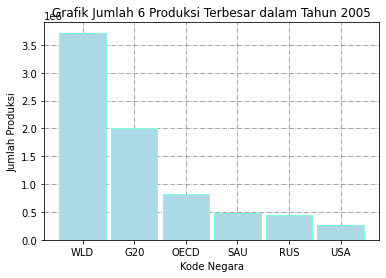

In [7]:
# STEP 4 Data in one Years
st.header("Oil Data in a Year")
st.subheader("Oil Data in a Year is Data of Oil in a Year per Nations")
st.subheader("Data")
selected_B = st.slider("Ranking",min_value=1, max_value=None)
selected_year = st.sidebar.selectbox("Years",(list(reversed(range(1970,2021)))))
data_to_sort = data_minyak[data_minyak['tahun']==selected_year].sort_values(by='produksi',ascending=False).head(selected_B)
st.write(data_to_sort)
x_sort = data_to_sort['kode_negara'].tolist()
y_sort = data_to_sort['produksi'].tolist()
st.subheader("Graphic")
plt.bar(x_sort,y_sort,width=0.9, bottom=None, align="center",
            color="lightblue", edgecolor="aquamarine", data=None, zorder=6)
plt.grid(True, color="grey", linewidth="0.7", linestyle="-.", zorder=0)
plt.xlabel('Kode Negara')
plt.ylabel('Jumlah Produksi')
plt.title('Grafik Jumlah Produksi Terbesar dalam Satu Tahun')
st.pyplot(plt)

#Contoh Tahun 2005 ranking 6 besar
data_to_sort_example = data_minyak[data_minyak['tahun']==2005].sort_values(by='produksi',ascending=False).head(6)
x_sort_example = data_to_sort_example['kode_negara'].tolist()
y_sort_example = data_to_sort_example['produksi'].tolist()
plt.bar(x_sort_example,y_sort_example,width=0.9, bottom=None, align="center",
            color="lightblue", edgecolor="aquamarine", data=None, zorder=6)
plt.grid(True, color="grey", linewidth="0.7", linestyle="-.", zorder=0)
plt.xlabel('Kode Negara')
plt.ylabel('Jumlah Produksi')
plt.title('Grafik Jumlah 6 Produksi Terbesar dalam Tahun 2005')
plt.show()


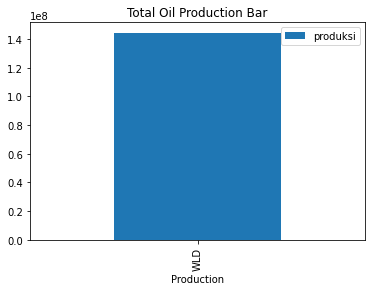

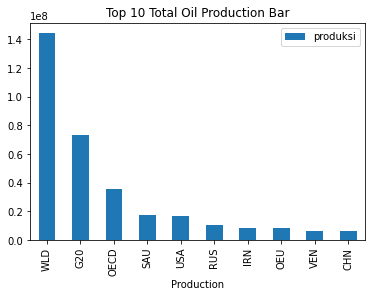

In [8]:
# STEP 5 Total Data Oil per Natiions
st.header("Total Oil Production per Nation")
st.subheader("Total Oil Production per Nation is the Accumulation of Oil Production in Whole Year")
st.subheader("Data")
selected_total = st.slider("Nations' data",min_value=1, max_value=None)
total_oil = data_minyak.groupby('kode_negara')['produksi'].sum()
total_oil = pd.DataFrame(total_oil)
total_oil_to_sort = total_oil.sort_values(by='produksi', ascending=False).head(selected_total)
st.write(total_oil_to_sort)
total_oil_to_plot = total_oil_to_sort.plot(kind='bar')
st.subheader("Graphic")
plt.title("Total Oil Production Bar")
plt.xlabel("Production")
st.pyplot(plt)

# CONTOH  10 negara terbesar
total_oil_to_sort_example = total_oil.sort_values(by='produksi', ascending=False).head(10)
total_oil_to_plot_example = total_oil_to_sort_example.plot(kind='bar')
st.subheader("Graphic")
plt.title("Top 10 Total Oil Production Bar")
plt.xlabel("Production")
plt.show()

In [9]:
#STEP 6 Oil Information
st.header("Oil Information")
st.subheader("Oil information is information that contains : ")
'''-Full name of country, country code, region, and sub-region with the largest amount of production in year T and the whole year'''
'''-Full name of the country,the code of the country, region, and sub-region with the smallest number of production (not equal to zero) in year T and the whole year'''
'''-Full country name, country code, region, and sub-region with total production equal to zero in year T and the whole year'''

slide_years = st.sidebar.slider("Range Years", min_value=1971, max_value=2015)
years = list(data_minyak['tahun'])

maks = {'negara':[],
        'kode_negara':[],
        'region':[],
        'sub_region':[],
        'produksi':[],
        'tahun':years}
mins = {'negara':[],
        'kode_negara':[],
        'region':[],
        'sub_region':[],
        'produksi':[],
        'tahun':years}
none =  {'negara':[],
        'kode_negara':[],
        'region':[],
        'sub_region':[],
        'produksi':[],
        'tahun':years}


In [10]:
# Make an rowed json data
with open('kode_negara_lengkap.json','r') as file :
        data = json.load(file)
        dic = {}
        key_li = list(data[0].keys())
        for key in key_li:
            dic[key] = []
        for i in data :
            for key in key_li:
                dic[key].append(i[key])
        data_to_use = pd.DataFrame(dic)
        

                  name alpha-2 alpha-3 country-code     iso_3166-2   region  \
0          Afghanistan      AF     AFG          004  ISO 3166-2:AF     Asia   
1       Ã…land Islands      AX     ALA          248  ISO 3166-2:AX   Europe   
2              Albania      AL     ALB          008  ISO 3166-2:AL   Europe   
3              Algeria      DZ     DZA          012  ISO 3166-2:DZ   Africa   
4       American Samoa      AS     ASM          016  ISO 3166-2:AS  Oceania   
..                 ...     ...     ...          ...            ...      ...   
244  Wallis and Futuna      WF     WLF          876  ISO 3166-2:WF  Oceania   
245     Western Sahara      EH     ESH          732  ISO 3166-2:EH   Africa   
246              Yemen      YE     YEM          887  ISO 3166-2:YE     Asia   
247             Zambia      ZM     ZMB          894  ISO 3166-2:ZM   Africa   
248           Zimbabwe      ZW     ZWE          716  ISO 3166-2:ZW   Africa   

             sub-region intermediate-region region-

In [11]:
#Make an Iteration

for tahun in years :
    data_per_years = data_minyak[data_minyak['tahun']==tahun]
    produksi = np.array(data_per_years['produksi'].tolist())
    max_ = max(produksi)
    min_ = min([p for p in produksi if p != 0])
    none_ = min([p for p in produksi if p == 0])
    
    # Maximum Production
    nation_max = data_minyak[data_minyak['produksi']==max_]['kode_negara'].tolist()[0]
    if nation_max == 'WLD' :
        nation_max = 'WLF'
    maks['negara'].append(data_to_use[data_to_use['alpha-3']==nation_max]['name'].tolist()[0])
    maks['kode_negara'].append(nation_max)
    maks['region'].append(data_to_use[data_to_use['alpha-3']==nation_max]['region'].tolist()[0])
    maks['sub_region'].append(data_to_use[data_to_use['alpha-3']==nation_max]['sub-region'].tolist()[0])
    maks['produksi'].append(max_)
    # Minimum Production
    nation_min = data_minyak[data_minyak['produksi']==min_]['kode_negara'].tolist()[0]
    if nation_min == 'WLD' :
        nation_min = 'WLF'
    mins['negara'].append(data_to_use[data_to_use['alpha-3']==nation_min]['name'].tolist()[0])
    mins['kode_negara'].append(nation_min)
    mins['region'].append(data_to_use[data_to_use['alpha-3']==nation_min]['region'].tolist()[0])
    mins['sub_region'].append(data_to_use[data_to_use['alpha-3']==nation_min]['sub-region'].tolist()[0])
    mins['produksi'].append(min_)    
    # None Production
    nation_none = data_minyak[data_minyak['produksi']==none_]['kode_negara'].tolist()[0]
    if nation_none == 'WLD' :
        nation_none = 'WLF'
    none['negara'].append(data_to_use[data_to_use['alpha-3']==nation_none]['name'].tolist()[0])
    none['kode_negara'].append(nation_none)
    none['region'].append(data_to_use[data_to_use['alpha-3']==nation_none]['region'].tolist()[0])
    none['sub_region'].append(data_to_use[data_to_use['alpha-3']==nation_none]['sub-region'].tolist()[0])
    none['produksi'].append(none_)   
    
data_minyak_maks = pd.DataFrame(maks)
data_minyak_mins = pd.DataFrame(mins)
data_minyak_none = pd.DataFrame(none)


In [12]:
#Write the Data in Setreamlit
st.write('Maximum Oil Production in-{}'.format(slide_years))
st.write(data_minyak_maks[data_minyak_maks['tahun']==slide_years])

st.write('Maximum Table')
st.write(data_minyak_maks)

st.write('Minimum Oil Production in-{}'.format(slide_years))
st.write(data_minyak_mins[data_minyak_mins['tahun']==slide_years])

st.write('Minimum Table')
st.write(data_minyak_mins)

st.write('Zero Oil Prodution in-{}'.format(slide_years))
st.write(data_minyak_none[data_minyak_none['tahun']==slide_years])

st.write('Zero Table')
st.write(data_minyak_none)

st.write("Thank You for Choosing Us")


In [14]:
## Contoh 2010
slide_years = 2010
years = list(data_minyak['tahun'])

maks = {'negara':[],
        'kode_negara':[],
        'region':[],
        'sub_region':[],
        'produksi':[],
        'tahun':years}
mins = {'negara':[],
        'kode_negara':[],
        'region':[],
        'sub_region':[],
        'produksi':[],
        'tahun':years}
none =  {'negara':[],
        'kode_negara':[],
        'region':[],
        'sub_region':[],
        'produksi':[],
        'tahun':years}

with open('kode_negara_lengkap.json','r') as file :
        data = json.load(file)
        content = {}
        words = list(data[0].keys())
        for word in words:
            content[word] = []
        for strip in data :
            for word in words:
                content[word].append(strip[word])
        data_to_use = pd.DataFrame(content)

#Make an Iteration
for tahun in years :
    data_per_years = data_minyak[data_minyak['tahun']==tahun]
    produksi = np.array(data_per_years['produksi'].tolist())
    max_ = max(produksi)
    min_ = min([p for p in produksi if p != 0])
    none_ = min([p for p in produksi if p == 0])
    
    # Maximum Production
    nation_max = data_minyak[data_minyak['produksi']==max_]['kode_negara'].tolist()[0]
    if nation_max == 'WLD' :
        nation_max = 'WLF'
    maks['negara'].append(data_to_use[data_to_use['alpha-3']==nation_max]['name'].tolist()[0])
    maks['kode_negara'].append(nation_max)
    maks['region'].append(data_to_use[data_to_use['alpha-3']==nation_max]['region'].tolist()[0])
    maks['sub_region'].append(data_to_use[data_to_use['alpha-3']==nation_max]['sub-region'].tolist()[0])
    maks['produksi'].append(max_)
    # Minimum Production
    nation_min = data_minyak[data_minyak['produksi']==min_]['kode_negara'].tolist()[0]
    if nation_min == 'WLD' :
        nation_min = 'WLF'
    mins['negara'].append(data_to_use[data_to_use['alpha-3']==nation_min]['name'].tolist()[0])
    mins['kode_negara'].append(nation_min)
    mins['region'].append(data_to_use[data_to_use['alpha-3']==nation_min]['region'].tolist()[0])
    mins['sub_region'].append(data_to_use[data_to_use['alpha-3']==nation_min]['sub-region'].tolist()[0])
    mins['produksi'].append(min_)    
    # None Production
    nation_none = data_minyak[data_minyak['produksi']==none_]['kode_negara'].tolist()[0]
    if nation_none == 'WLD' :
        nation_none = 'WLF'
    none['negara'].append(data_to_use[data_to_use['alpha-3']==nation_none]['name'].tolist()[0])
    none['kode_negara'].append(nation_none)
    none['region'].append(data_to_use[data_to_use['alpha-3']==nation_none]['region'].tolist()[0])
    none['sub_region'].append(data_to_use[data_to_use['alpha-3']==nation_none]['sub-region'].tolist()[0])
    none['produksi'].append(none_)   
    
data_minyak_maks = pd.DataFrame(maks)
data_minyak_mins = pd.DataFrame(mins)
data_minyak_none = pd.DataFrame(none)
data_minyak_maks
data_minyak_mins
data_minyak_none
    

,negara,kode_negara,region,sub_region,produksi,tahun
0,Belgium,BEL,Europe,Western Europe,0.0,1971
1,Belgium,BEL,Europe,Western Europe,0.0,1972
2,Belgium,BEL,Europe,Western Europe,0.0,1973
3,Belgium,BEL,Europe,Western Europe,0.0,1974
4,Belgium,BEL,Europe,Western Europe,0.0,1975
...,...,...,...,...,...,...
5834,Belgium,BEL,Europe,Western Europe,0.0,2011
5835,Belgium,BEL,Europe,Western Europe,0.0,2012
5836,Belgium,BEL,Europe,Western Europe,0.0,2013
5837,Belgium,BEL,Europe,Western Europe,0.0,2014
